In [9]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


data = pd.read_csv('data.csv', index_col='Index')

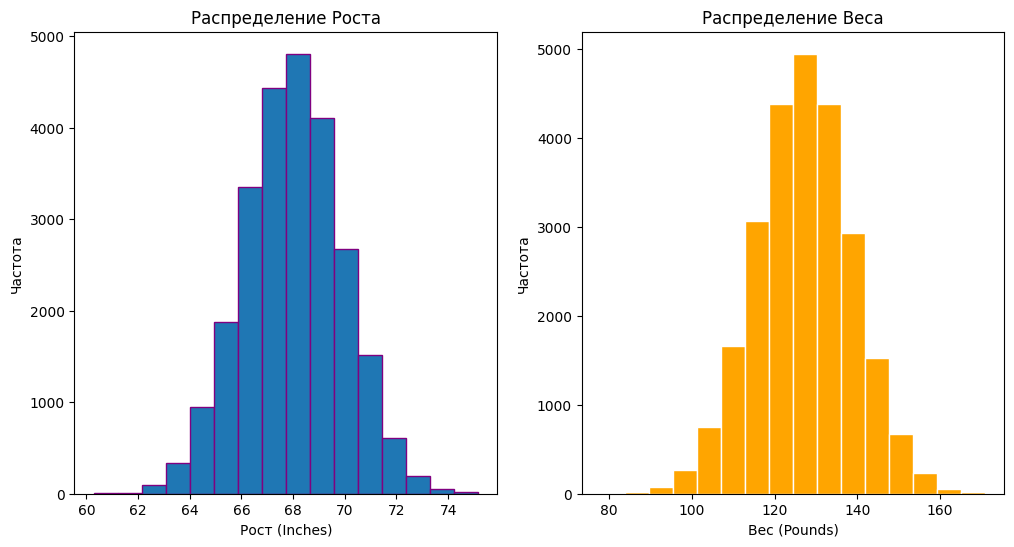

In [10]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Height(Inches)'],edgecolor='purple', bins=16)
plt.title('Распределение Роста')
plt.xlabel('Рост (Inches)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(data['Weight(Pounds)'], bins=16,edgecolor='white', color='orange')
plt.title('Распределение Веса')
plt.xlabel('Вес (Pounds)')
plt.ylabel('Частота')

plt.show()

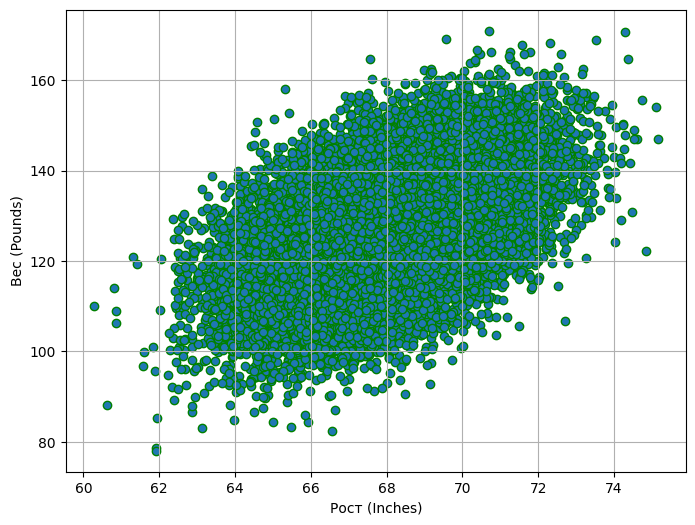

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Height(Inches)'], data['Weight(Pounds)'], edgecolors='g')
plt.xlabel('Рост (Inches)')
plt.ylabel('Вес (Pounds)')
plt.grid(True)
plt.show()

In [12]:
correlation = data['Height(Inches)'].corr(data['Weight(Pounds)'])
print(f'Коэфицент корреляции = {correlation}')

Коэфицент корреляции = 0.5028585206028434


In [13]:
height = data['Height(Inches)']
weight = data['Weight(Pounds)']

mean_height = np.mean(height)
mean_weight = np.mean(weight)

# Рассчитываем ковариацию и дисперсию
covariance = np.cov(height, weight, ddof=0)[0, 1]  # Ковариация между ростом и весом
variance_height = np.var(height, ddof=0)  # Дисперсия роста
variance_weight = np.var(weight, ddof=0)  # Дисперсия веса

# Вычисляем коэффициенты линейной регрессии
slope = covariance / variance_height  # Коэффициент наклона (slope)
intercept = mean_weight - slope * mean_height  # Пересечение (intercept)

print("Коэффициент наклона (slope):", slope)
print("Параметр пересечения (intercept):", intercept)

Коэффициент наклона (slope): 3.0834764454029653
Параметр пересечения (intercept): -82.57574306454084


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predicted_weights = intercept + slope * height

print("Среднеквадратическая ошибка (MSE):", mean_squared_error(weight, predicted_weights))
print("Средняя абсолютная ошибка (MAE):", mean_absolute_error(weight, predicted_weights))
print("Коэффициент детерминации (R^2):", r2_score(weight, predicted_weights))

Среднеквадратическая ошибка (MSE): 101.58853248632849
Средняя абсолютная ошибка (MAE): 8.037502348939364
Коэффициент детерминации (R^2): 0.2528666917428807


In [62]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Градиенты для коэффициентов
def compute_gradients(X, y, weights):
    n = len(y)
    predictions = np.dot(X, weights)
    errors = predictions - y
    gradients = (1/n) * np.dot(X.T, errors)
    return gradients

# Метод пакетного градиентного спуска с остановкой по изменению MSE
def batch_gradient_descent(X, y, learning_rate, epsilon):
    n, m = X.shape
    weights = np.zeros(m)
    error_history = []

    current_mse = mean_squared_error(y, np.dot(X, weights))

    while current_mse > epsilon:
        gradients = compute_gradients(X, y, weights)
        weights -= learning_rate * gradients
        predictions = np.dot(X, weights)
        current_mse = mean_squared_error(y, predictions)
        error_history.append(current_mse)

    return weights, error_history

# Метод стохастического градиентного спуска с остановкой по изменению MSE
def stochastic_gradient_descent(X, y, learning_rate, epsilon):
    n, m = X.shape
    weights = np.zeros(m)
    error_history = []

    current_mse = mean_squared_error(y, np.dot(X, weights))

    while current_mse > epsilon:
        random_index = np.random.randint(n)
        xi = X[random_index]
        yi = y[random_index]
        gradient = xi * (np.dot(xi, weights) - yi)
        weights -= learning_rate * gradient
        predictions = np.dot(X, weights)
        current_mse = mean_squared_error(y, predictions)
        error_history.append(current_mse)

    return weights, error_history

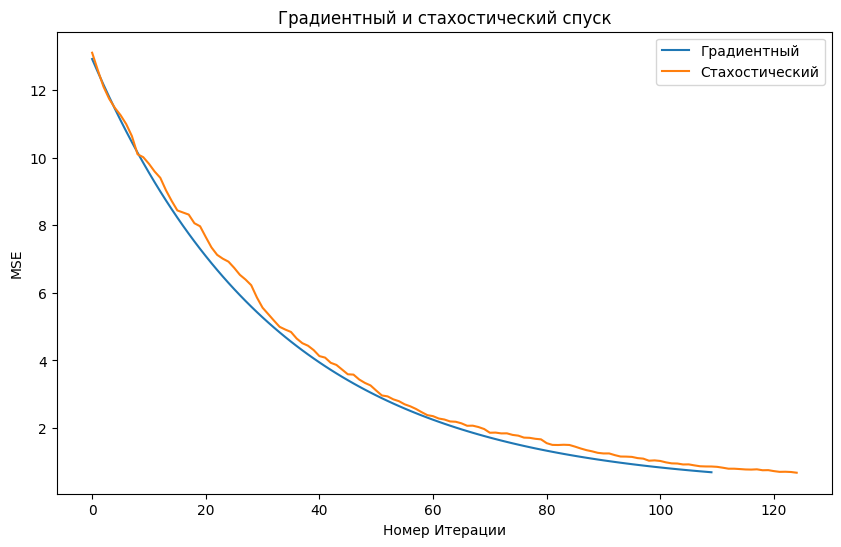

Время выполнения пакетного градиентного спуска: 0.0010006427764892578 секунд
Время выполнения стохастического градиентного спуска: 0.0020003318786621094 секунд


In [65]:
# Создание данных для примера

X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + 1 + 0.1 * np.random.randn(100)

# Добавим столбец с единицами для коэффициента смещения (intercept)
X = np.column_stack((np.ones(100), X))

learning_rate = 0.01


# Запуск метода пакетного градиентного спуска
start_time = time.time()
weights_batch, error_history_batch = batch_gradient_descent(X, y, learning_rate, 0.7)
batch_execution_time = time.time() - start_time

# Запуск метода стохастического градиентного спуска
start_time = time.time()
weights_stochastic, error_history_stochastic = stochastic_gradient_descent(X, y, learning_rate, 0.7)

stochastic_execution_time = time.time() - start_time

plt.figure(figsize=(10, 6))
plt.plot(range(len(error_history_batch)), error_history_batch, label='Градиентный')
plt.plot(range(len(error_history_stochastic)), error_history_stochastic, label='Стахостический')

plt.xlabel('Номер Итерации')
plt.ylabel('MSE')
plt.legend()
plt.title('Градиентный и стахостический спуск')
plt.show()

print("Время выполнения пакетного градиентного спуска:", batch_execution_time, "секунд")
print("Время выполнения стохастического градиентного спуска:", stochastic_execution_time, "секунд")
